# LSN_8

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters: $\sigma$ and $\mu$.

# Exercise 8.1

## Assigment

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

## How do I compute the expectation?

In order to compute the expectation for my energy, what i need to compute is an integral:

$$\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$$

Which, by means of my MC simulation, can be computed as:


$$\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \int dx \rho(x) \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} \simeq \sum{\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}}$$ 

With $x\sim\rho(x)$ where we defined rho as the distribution coming from our trial wave function:

$$ \rho :=  \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} $$

We saw that the Metropolis algortithm is able of sampling efficiently a wide variety of distributions, including $\rho$. Once I obtained points drawn from $\rho$, I can make use of the definition of the Hamiltonian:

$$ H\Psi_T(x) := \left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x)\right]\Psi_T(x) =  \left[-\frac{1}{2}\frac{\partial^2}{\partial x^2} + V(x)\right]\Psi_T(x)$$

Since I'm in a framework where $\hbar=m=1$.

Initially, I start by sampling a trial wave function with $\mu=0$, $\sigma=1$. 
Furthermore, I need to tackle the equilibration problem: the following plot shows the energy results of an equilibration procedure carried out for $N=100$ blocks with $L=10^3$ throws in each block.

In [561]:
import matplotlib.pyplot as plt
import numpy as np

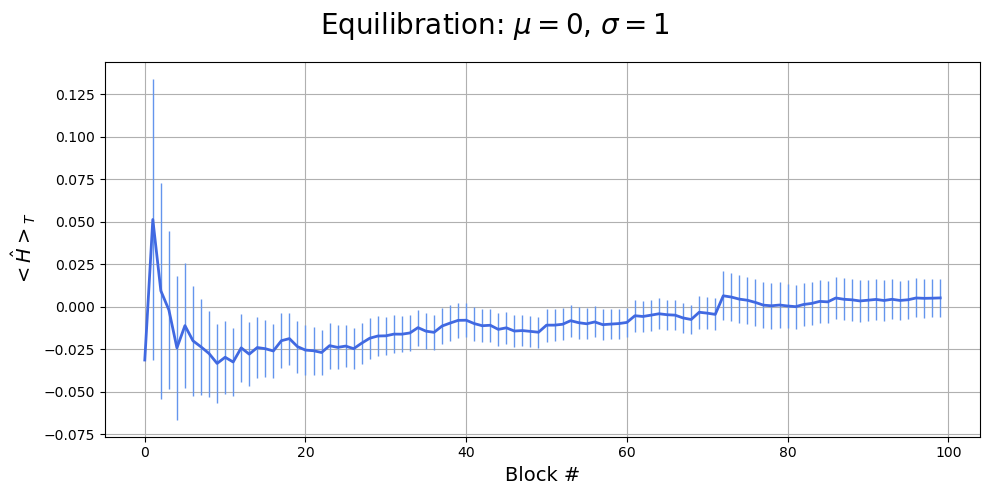

In [562]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Equilibration: $\mu=0$, $\sigma=1$', fontsize=20)

energy = np.loadtxt('./8.1/averagesNOEQ.txt', usecols=(0, 1, 2))
plt.errorbar(energy[:,0], energy[:,1], yerr=energy[:,2], c='royalblue',lw=2, elinewidth=1, ecolor='cornflowerblue', label='Uniform transition')
plt.grid()
plt.ylabel('$<\hat{H}>_T$', fontsize=14)
plt.xlabel('Block #', fontsize=14)
plt.tight_layout()
plt.show()

Given this results, I settled that $N=100$ blocks, each comprising of $L=10^3$ throws is widely enough for the equilibration of my algorithm. The following plot shows the results of the computation of the expectated value of the Hamiltonian. The plot was produced through an equilibrated simulation of $N=1000$ blocks with $L=10^3$ throws and an acceptance rate of the Metropolis algorithm of $50\%$. 

Of course, by changing the parameters of my Trial wave function I get a different value of my expectation. A priori, since the model cannot be solved analytically, i can't say which combination of parameters ($\mu$, $\sigma$) produces a lower expectation for the Hamiltonian. In the following plot I carried out the simulation for two set of parameters, ($\mu$=1, $\sigma=1$) and ($\mu=0.1$, $\sigma=1$)

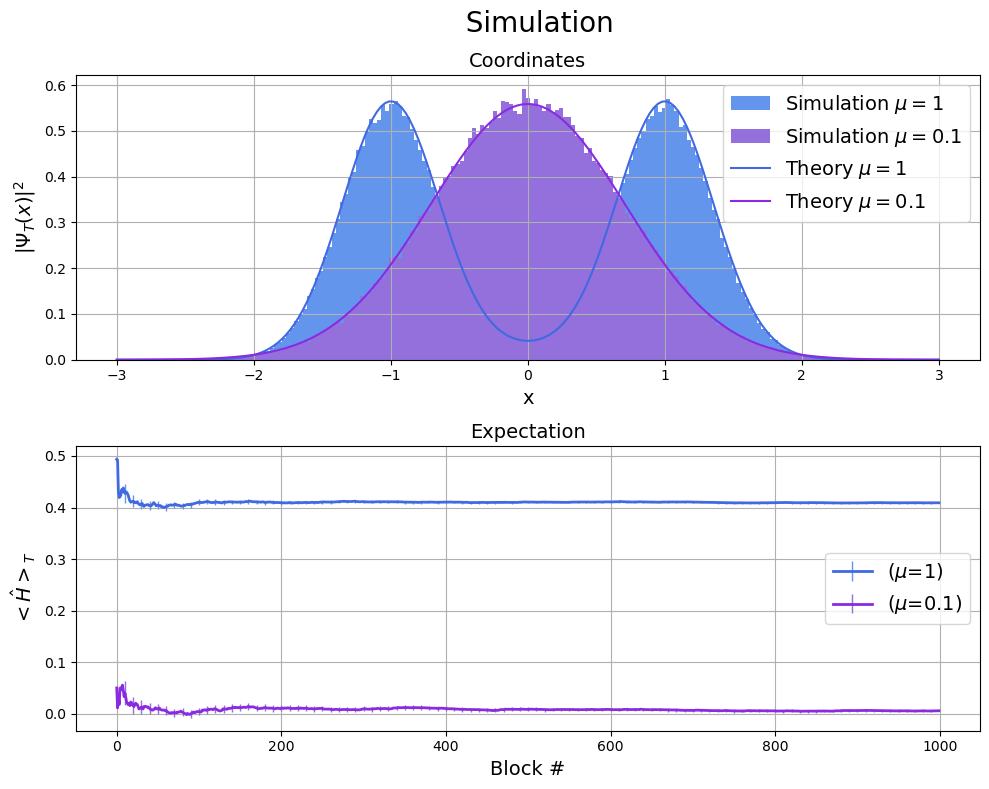

In [636]:
# Definition of the trial wave function used for plotting analytical results
def TWF(x, mu, sigma):
    return (np.exp(-(x-mu)**2/(2*sigma**2))+np.exp((-(x+mu)**2/(2*sigma**2))))**2

# Create a figure
fig = plt.figure(figsize=(10,8))
fig.suptitle('          Simulation', fontsize=20)

# Create subplot 2
plt.subplot(2,1,2)

# Load and plot data for mu = 0, sigma = 1
energy = np.loadtxt('./8.1/Averages0.txt', usecols=(0, 1, 2))
plt.errorbar(energy[:,0], energy[:,1], yerr=energy[:,2], errorevery=10, c='royalblue',lw=2, elinewidth=1, ecolor='cornflowerblue', label='($\mu$=1)')

# Load and plot data for mu = 1, sigma = 1
energy = np.loadtxt('./8.1/averages1.txt', usecols=(0, 1, 2))
plt.errorbar(energy[:,0], energy[:,1], yerr=energy[:,2], errorevery=10, c='blueviolet',lw=2, elinewidth=1, ecolor='mediumpurple', label='($\mu$=0.1)')

plt.grid()
plt.title('Expectation', fontsize=14)
plt.ylabel('$<\hat{H}>_T$', fontsize=14)
plt.xlabel('Block #', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()

# Create subplot 1
plt.subplot(2,1,1)

plt.title('Coordinates', fontsize=14)

# Load and plot simulation data for mu = 1
positions=np.loadtxt('./8.1/Coordinates0.txt')
plt.hist(positions, density=True, bins=np.linspace(-3,3,200), label='Simulation $\mu=1$', color='cornflowerblue')

# Load and plot simulation data for mu = 0.1
positions=np.loadtxt('./8.1/Coordinates1.txt')
plt.hist(positions, density=True, bins=np.linspace(-3,3,200), label='Simulation $\mu=0.1$', color='mediumpurple')

# Plot theoretical curve for mu = 1
plt.plot(np.linspace(-3,3,200),(1/(np.sqrt(np.pi)))*TWF(np.linspace(-3,3,200), 1, 0.5), color='royalblue', label = 'Theory $\mu=1$')

# Plot theoretical curve for mu = 0.1
plt.plot(np.linspace(-3,3,200),(1/(4*np.sqrt(np.pi)))*TWF(np.linspace(-3,3,200), 0.1, 1), color='blueviolet', label = 'Theory $\mu=0.1$')

plt.legend(fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('$|\Psi_T(x)|^{2}$', fontsize=14)
plt.grid()
plt.tight_layout()

fig.tight_layout()
plt.show()


# Exercise 08.2

## Assigment

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a Simulated Annealing (SA) algorithm.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$  and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture **of the sampled** $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

## Simulated Annealing (SA)

The idea of this algorithm is using two Metropolis schemes simulataneously: the first one is used to sample the trial distribution $\Psi_T$ for a given set of parameters ($\mu$, $\sigma$) from which we are able of computing the expectation of the Hamiltonian $<\hat{H}_T>$.
The second scheme is used for finding the set of parameters which minimize the variational. This second algorithm could be summed up as follows:

- Set an initial temperature $T_0$ or $\beta_0$ and an initial state in our parameter space ($\mu_0$, $\sigma_0$). In my algorithm i chose $T_0 = 2.0$ and ($\mu_0$, $\sigma_0$) = ($1$,$1$).
- compute initial energy $<\hat{H}_T>_0$ as previously explained.
- Change the parameters ($\mu$, $\sigma$) and compute the energy.
- Accept the change of parameters with probability $e^{-\beta(E_{new}-E_{old})}$
- Cool down the system by reducing the temperature $T$ (i.e. by increasing $\beta$) and repeat.
- Once the temperature reaches a lower temperature bound, the annealing is finished.

The idea is that through simulated annealing one aims of solving an optimization problem by exploring the 'energy profile' of the parameters space. In other words: the probability of accepting a new parameters set depends upon their energy (the lower the better) and the temperature. Initially, when the temperature is higher, bigger jumps in the parameters space as still possible, allowing us to explore widely the space without getting stuck in a local minima as it could happen in a simple gradient descent scheme. Eventually, when the temperature drops, the system gets stuck in a minimum: it is not guaranteed that this would be the global minimum but most likely the system will have explored the space sufficiently to encounter a satisfying approximation of this global minimum.

In my algorithm, I chose to move the parameters using a uniform probability whose step decreases according to the current temperature:

```c++
                              m_f->Set_Mu(abs(oldMu + m_rnd->Rannyu(-1, 1) * .5 * (1/m_beta)));
```

And i used $T=0.01$ as temperature lower bound for the scheme.

The simulation is carried out using $N=1000$ blocks with $L=10^3$ throws for each temperature and temptative set of parameters. Each simulation is initially equilibrated: this step is not necessary for the SA tecnique but I decided to use it the same.

## Results

/var/folders/32/tw4g3hmn3kj43x7fc_2rsbmr0000gn/T/ipykernel_62153/461759094.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(np.linspace(min(betas),max(betas),6, dtype=int))


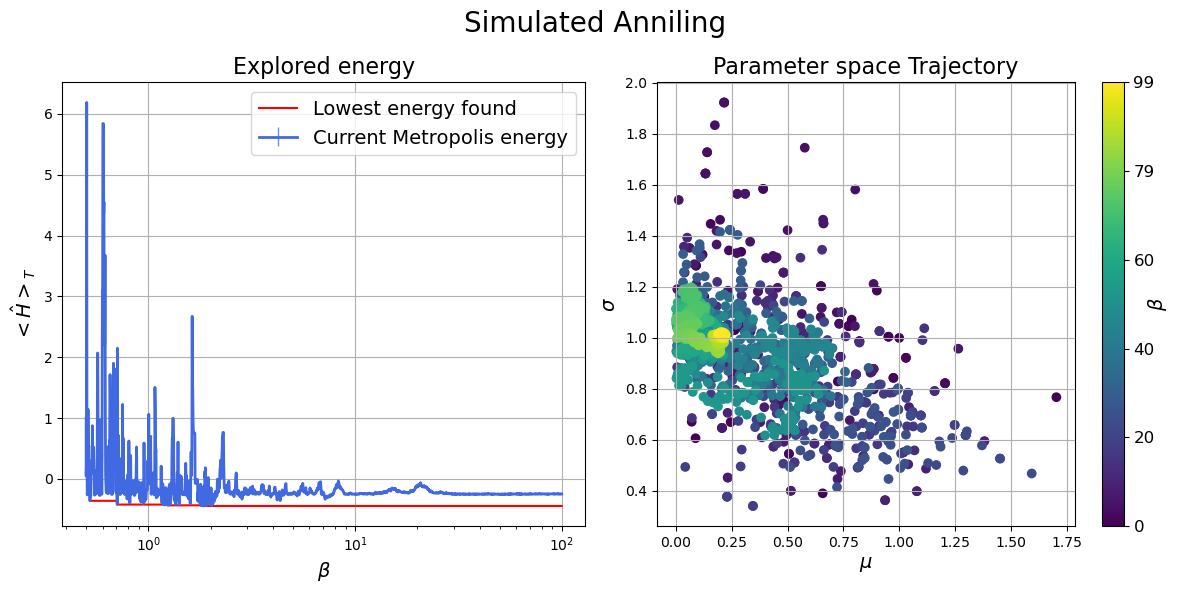

In [620]:
plt.figure(figsize=(12,6))
plt.suptitle('Simulated Anniling', fontsize=20)

plt.subplot(1,2,1)
energy = np.loadtxt('./8.2/averages.txt', usecols=(0, 1, 2, 3))
plt.errorbar(1/energy[:,0], energy[:,1], yerr=energy[:,2], errorevery=10, c='royalblue',lw=2, elinewidth=1, ecolor='cornflowerblue', label='Current Metropolis energy')

plt.plot(1/energy[:,0], energy[:,3], c='red', label='Lowest energy found')

plt.xlabel('$\\beta$',fontsize=14)
plt.ylabel('$<\hat{H}>_T$', fontsize=14)
plt.xscale('log')
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.title('Explored energy', fontsize=16)

plt.subplot(1,2,2)

parameters = np.loadtxt('./8.2/parameters.txt', usecols=(0, 1, 2))
betas=1/parameters[:,0]

cmap = plt.cm.get_cmap('viridis')

colors = cmap(np.arange(len(np.unique(betas))) / (len(np.unique(betas)) - 1))
color_indices = np.unique(betas, return_inverse=True)[1]

plt.scatter(parameters[:, 1], parameters[:, 2], c=colors[color_indices])
plt.xlabel('$\mu$', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12)
cbar.set_label('$\\beta$', fontsize=14)  # Change the fontsize of the colorbar label
cbar.ax.yaxis.set_label_coords(2.0, 0.5)
cbar.set_ticklabels(np.linspace(min(betas),max(betas),6, dtype=int))
plt.grid()
plt.title('Parameter space Trajectory', fontsize=16)

plt.tight_layout()
plt.show()

The first plot of the previous figure shows the computed energy as function of the current $\beta$ of the SA scheme. Clearly, where the temperatures are higher (lower $\beta$) the system is able of exploring the system more widely and produces more variability in the energies. Furthermore, at lower temperatures it stabilizes into a local minimum.

The second plot shows the set of parameters accepted during the SA algorithm: the darker dots (higher temperatures) result more sparse while the ones in yellow (lower temperatures) are more concentrated into a basin of attraction.

In [624]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)


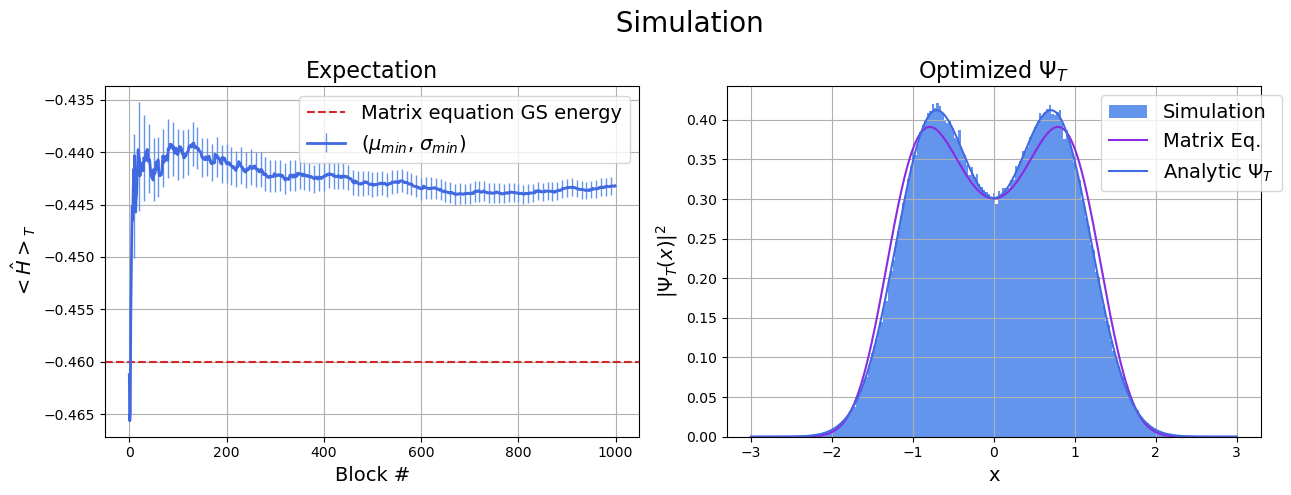

In [635]:
fig = plt.figure(figsize=(13,5))
fig.suptitle('          Simulation', fontsize=20)

plt.subplot(1,2,1)

#mu = 0, sigma = 1
energy = np.loadtxt('./8.2/OptimizedEnergy.txt', usecols=(0, 1, 2))
plt.errorbar(energy[:,0], energy[:,1], yerr=energy[:,2], errorevery=10, c='royalblue',lw=2, elinewidth=1, ecolor='cornflowerblue', label='($\mu_{min}$, $\sigma_{min}$)')
plt.axhline(-0.46, ls='--', c='tab:red', label='Matrix equation GS energy')

plt.grid()
plt.title('Expectation', fontsize=16)
plt.ylabel('$<\hat{H}>_T$', fontsize=14)
plt.xlabel('Block #', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()

plt.subplot(1,2,2)

plt.title('Optimized $\Psi_{T}$', fontsize=16)
positions=np.loadtxt('./8.2/OptimizedCoordinates.txt')
plt.hist(positions, density=True, bins=np.linspace(-3,3,200), label='Simulation', color='cornflowerblue')
plt.plot(x,(psi[0])**2, color='blueviolet', label='Matrix Eq.')
plt.plot(np.linspace(-3,3,200),(1/(1.5*np.sqrt(np.pi)))*TWF(np.linspace(-3,3,200), 0.7902, 0.623073), color='royalblue', label = 'Analytic $\Psi_T$')
plt.legend(fontsize=14, loc=(0.7,0.7))
plt.xlabel('x', fontsize=14)
plt.ylabel('$|\Psi_T(x)|^2$', fontsize=14)
plt.grid()
plt.tight_layout()

fig.tight_layout()
plt.show()

At the end of the algorithm the optimized parameters I found are:

- $\mu_{min} = 0.7902$
- $\sigma_{min} = 0.623073$

The plot on the left shows the blocking average for the optimized parameters while on the right it is shown the sampled distribution of the optimized trial wave function $\Psi_{T}$ compared to the analytic results: the one obtained through the definition of $\Psi_{T}$ and the one produced by the Matrix equation tecnique. 

Remarkably, the lowest energy found is not compatible with the theoretic result coming from the Matrix Equation tecnique: we should once again stress that SA is no guaranteed to converge in the global optimum but it is able of rapidly finding an aproximation of it through a local optimum which is not that far from the exact solution.